In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

%matplotlib inline
import random
import scipy as sp
import scipy.interpolate

In [2]:
# set seed to reproducible
import matplotlib.pyplot as plt
import matplotlib.animation
import seaborn as sns
import numpy as np
import json
import itertools
from scipy.interpolate import griddata
import pylab as p
import mpl_toolkits.mplot3d.axes3d as p3


In [3]:
class Landscape():
    def __init__(self, num_dimensions, dimension_size, num_grid_res=7, assigned_fitness=[]):
        self.num_dims = num_dimensions
        self.dim_size = dimension_size
        self.num_grid_res = num_grid_res
        self.chosen_points = self.gen_chosen_points()
        self.assigned_fitness = assigned_fitness
        self.fitness_grid = self.gen_landscape()
        self.ndspline = self.gen_spline_nd()

    def gen_chosen_points(self):
        k = complex(0, self.num_grid_res)
        grid_x, grid_y = np.mgrid[0:self.dim_size:k, 0:self.dim_size:k]
        return np.vstack((grid_x.ravel(), grid_y.ravel())).T

    def uniform_rand_fit_assign(self, min=1, max=100):
        num_rand_points = self.chosen_points.shape[0]
        rand_fitness_array = np.random.random_integers(min, max, num_rand_points)
        return rand_fitness_array

    def gen_landscape(self):
        if self.assigned_fitness == []:
            self.assigned_fitness = self.uniform_rand_fit_assign()
        grid_x, grid_y = np.mgrid[0:self.dim_size, 0:self.dim_size]
        return griddata(self.chosen_points, self.assigned_fitness, (grid_x, grid_y), method='cubic')
    
    def gen_spline_nd(self):
        if self.assigned_fitness == []:
            self.assigned_fitness = self.uniform_rand_fit_assign()
        #grid_x, grid_y = np.mgrid[0:self.dim_size, 0:self.dim_size]
        spline = sp.interpolate.Rbf(self.chosen_points[:,0],self.chosen_points[:,1],self.assigned_fitness,function='thin_plate',smooth=5, episilon=5)
        return spline

    def draw_2d_in_3d(self, elevation_deg=80, rotation_deg=90):
        grid_x, grid_y = np.mgrid[0:self.dim_size, 0:self.dim_size]
        fig = p.figure(figsize=(20,20))
        ax = p3.Axes3D(fig)
        # ax.plot_wireframe(grid_x,grid_y,self.fitness_grid, color = 'black')
        ax.contour3D(grid_x, grid_y, self.fitness_grid, 50, cmap=plt.cm.viridis)
        ax.set_xlabel('loci_0')
        ax.set_ylabel('loci_1')
        ax.set_zlabel('Fitness')
        ax.view_init(elevation_deg, rotation_deg)
        p.show()

    def draw_2d(self):
        plt.plot(self.chosen_points[:, 0], self.chosen_points[:, 1], 'k.', ms=10)
        plt.imshow(self.fitness_grid.T, extent=(0, self.dim_size, 0, self.dim_size), origin='lower')
        plt.title('Cubic')
        plt.gcf().set_size_inches(10, 10)
        plt.show()

    def draw_2d_sea(self):
        grid_x, grid_y = range(self.dim_size), range(self.dim_size)
        fig = plt.figure()
        ax = fig.gca(projection='3d')
        ax.plot_trisurf(grid_x, grid_y, self.fitness_grid, cmap=plt.cm.viridis, linewidth=0.2)
        plt.show()

In [4]:
half_diff = -45
corner = 50 - half_diff
middle = 50+half_diff
fitness_dots = [corner]*4 + [middle] + [corner]*4
land = Landscape(num_dimensions=2, dimension_size=300, num_grid_res=3, assigned_fitness=fitness_dots)

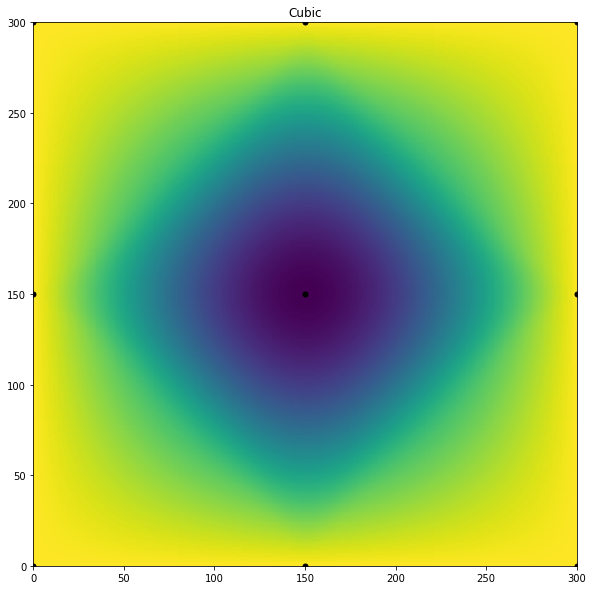

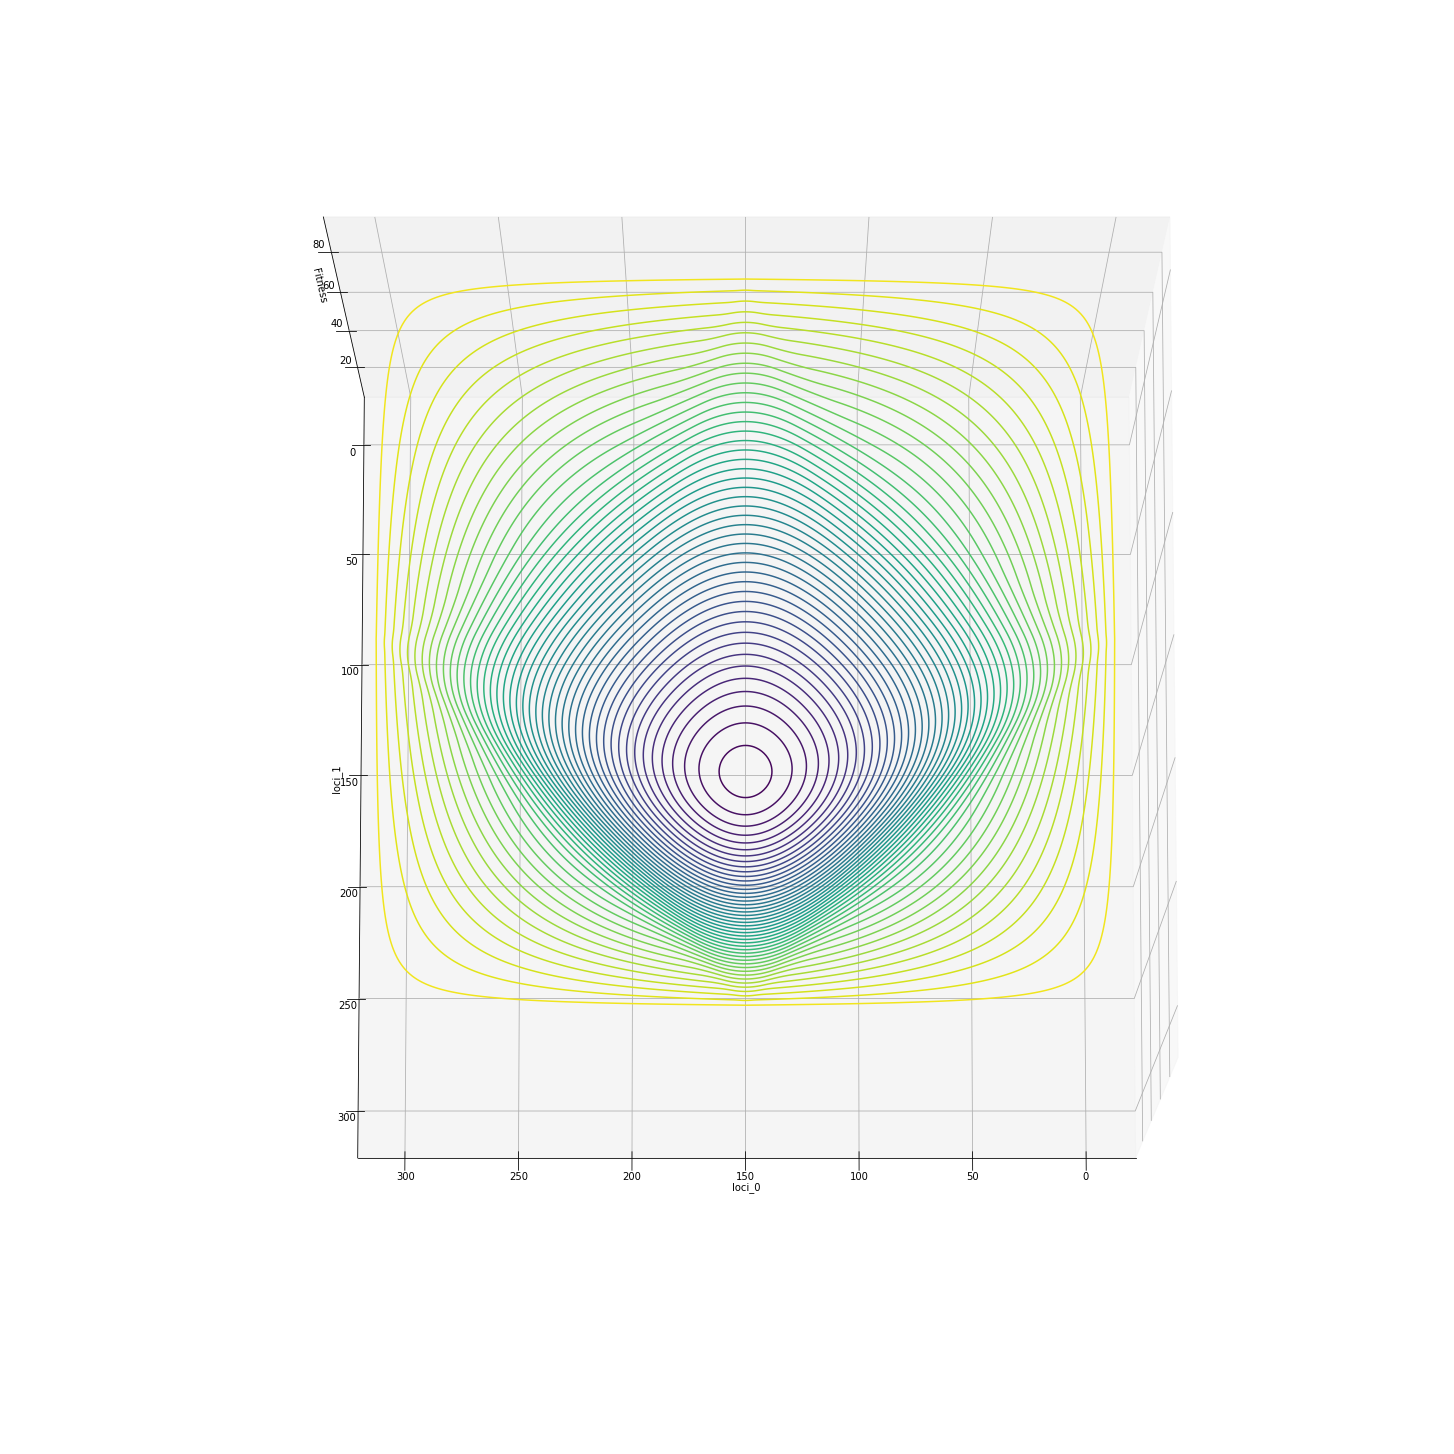

In [5]:
land.draw_2d()
land.draw_2d_in_3d()

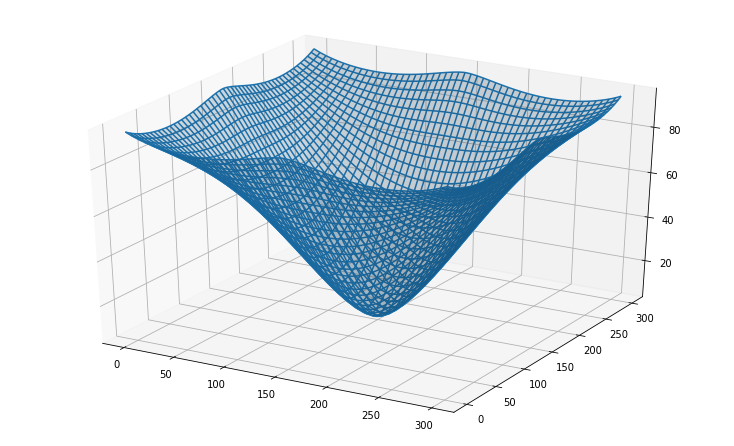

In [9]:
grid_x, grid_y = np.mgrid[0:300, 0:300]
Z = land.ndspline(grid_x, grid_y)
fig = plt.figure(figsize=(10,6))
ax = axes3d.Axes3D(fig)
ax.plot_wireframe(grid_x, grid_y, Z)
ax.plot_surface(grid_x, grid_y, Z,alpha=0.2)

In [ ]:
x_grid = np.linspace(0, max_value_range, 1000*len(x))
y_grid = np.linspace(0, max_value_range, 1000*len(y))
B1, B2 = np.meshgrid(x_grid, y_grid, indexing='xy')
Z = np.zeros((x.size, z.size))

spline = sp.interpolate.Rbf(x,y,z,function='thin_plate',smooth=5, episilon=5)

Z = spline(B1,B2)
fig = plt.figure(figsize=(10,6))
ax = axes3d.Axes3D(fig)
ax.plot_wireframe(B1, B2, Z)
ax.plot_surface(B1, B2, Z,alpha=0.2)
ax.scatter3D(x,y,z, c='r')

In [13]:
predict_data_size = 132000
x_predict = np.array([random.random()*max_value_range for p in range(0,predict_data_size)])
y_predict = np.array([random.random()*max_value_range for p in range(0,predict_data_size)])
z_predict = spline(x_predict, y_predict)
fig = plt.figure(figsize=(10,6))
ax = axes3d.Axes3D(fig)
ax.plot_wireframe(B1, B2, Z)
ax.plot_surface(B1, B2, Z,alpha=0.2)
ax.scatter3D(x_predict,y_predict,z_predict, c='r')

NameError: name 'spline' is not defined